In [160]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [161]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [162]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [163]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [164]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
#Base.classes.keys()

In [165]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [166]:
# Save references to each table
#Assigning the measurement 
Measurement = Base.classes.measurement

#Assigning the station
Station = Base.classes.station

In [167]:
# Create our session (link) from Python to the DB
session =Session(engine)

In [168]:
measurement_r = session.query(Measurement).first()
measurement_r.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x16e605570c8>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'date': '2010-01-01'}

In [169]:
# inspector = inspect(engine)
# columns = inspector.get_columns('hawaii')
# for each in columns:
#     PRINT(each['name'], each['type'])

# Exploratory Precipitation Analysis

In [170]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date)\
            .order_by(Measurement.date.desc())\
            .first()
mrecent_date = dt.datetime(2017,8,23)
print(f"The most recent date is: {most_recent}")

The most recent date is: ('2017-08-23',)


In [171]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
Un_Ano_Ago = dt.date(2017, 8, 23)
Time_Delta = dt.timedelta(days=365)
Answer = Un_Ano_Ago - Time_Delta
print(f"The query date from one year ago is: {Answer}")

The query date from one year ago is: 2016-08-23


In [172]:
# Perform a query to retrieve the data and precipitation scores
pre_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= Answer).all()

In [173]:
# Save the query results as a Pandas DataFrame and set the index to the date column and sort the dataframe by date
pre_prcp_df = pd.DataFrame(pre_prcp).set_index('date').sort_index(ascending=False)
pre_prcp_df

,prcp
date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00
...,...
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02


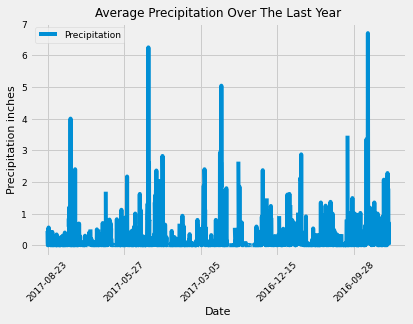

In [174]:
# Use Pandas Plotting with Matplotlib to plot the data
pre_prcp_df.plot()

#Adding the x,y labels & title:
plt.title("Average Precipitation Over The Last Year", fontsize=12)
plt.ylabel("Precipitation inches", fontsize= 11)
plt.yticks(color = 'black', fontsize= 9)
plt.xlabel("Date", fontsize= 11)
plt.xticks(color = 'black', fontsize= 9, rotation=45)
plt.legend(["Precipitation"],loc="best", fontsize=9)
plt.savefig("Images/precipitation.png")
plt.show()

In [175]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pre_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [176]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station).distinct().count()
print (f"The number of stations are: {stations}")

The number of stations are: 9


In [177]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
actives = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
            .order_by(func.count(Measurement.station).desc()).all()
print(f"The most active stations are:")
actives

The most active stations are:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [178]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == actives[0][0]).all()

print(f"The most active station is: {actives[0][0]} - {actives[0][1]}")
print(f"The lowest temperature is: {temps[0][0]}F")
print(f"The highest temperature is: {temps[0][1]}F")
print(f"The average temperature is: {temps[0][2]}F")

The most active station is: USC00519281 - 2772
The lowest temperature is: 54.0F
The highest temperature is: 85.0F
The average temperature is: 71.66378066378067F


In [179]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
us_station = pd.DataFrame(session.query(Measurement.date, Measurement.tobs)\
                .filter(Measurement.date >= Answer)\
                .filter(Measurement.station == actives[0][0])\
                .order_by(Measurement.date).all())
print(f"Temperature observation data for the most active station:")
us_station[:25]              


Temperature observation data for the most active station:


,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
5,2016-08-28,73.0
6,2016-08-29,78.0
7,2016-08-30,77.0
8,2016-08-31,78.0
9,2016-09-01,80.0


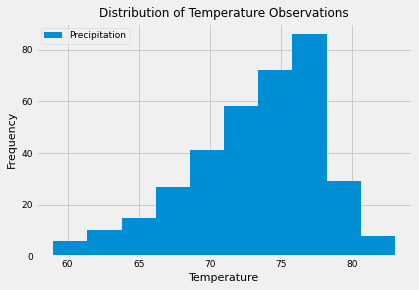

In [180]:
us_station.hist()
plt.title("Distribution of Temperature Observations",fontsize=12)
plt.xlabel('Temperature',fontsize= 11)
plt.xticks(color = 'black', fontsize= 9)
plt.ylabel('Frequency',fontsize= 11)
plt.yticks(color = 'black', fontsize= 9)
plt.legend(["Precipitation"],loc="best", fontsize=9)
plt.savefig("Images/temps_hist.png")


# Close session

In [181]:
# Close Session
session.close()